In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
import mglearn

c:\Users\CHU1P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\decomposition\_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


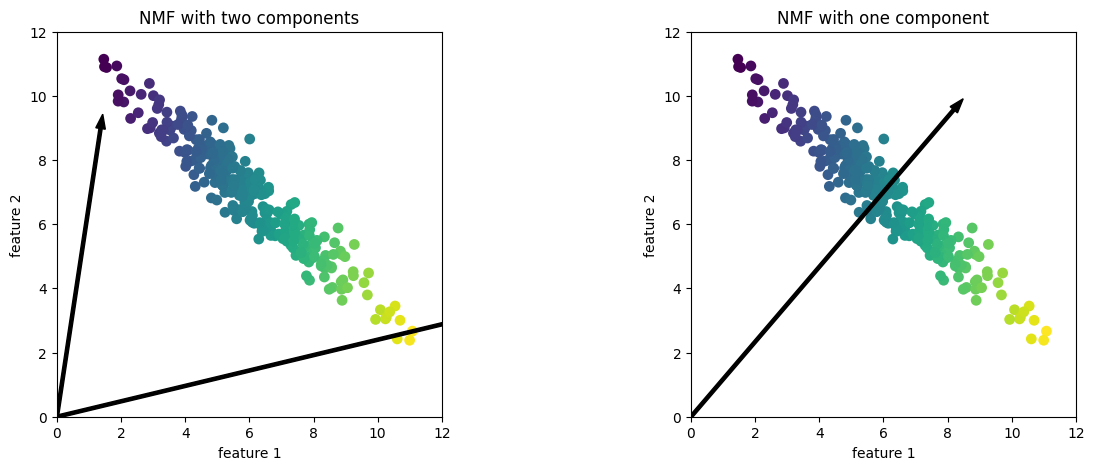

In [2]:
mglearn.plots.plot_nmf_illustration()

In [9]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people["images"][0].shape
mask = np.zeros(people["target"].shape, dtype=np.bool_)
for target in np.unique(people["target"]):
    # np.whereの戻り値がnumpy.ndarrayを中に含んだtupleのため[0]で取り出す
    # np.whereは満たすところのindexを返す
    mask[np.where(people["target"] == target)[0][:50]] = 1

X_people = people["data"][mask]
y_people = people["target"][mask]
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, random_state=0)
print(X_train.min(), X_train.max())

0.0 1.0


c:\Users\CHU1P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\decomposition\_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\CHU1P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\decomposition\_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\CHU1P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\decomposition\_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\CHU1P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\decomposition\_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\CHU1P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\decomposition\_nmf.py:1

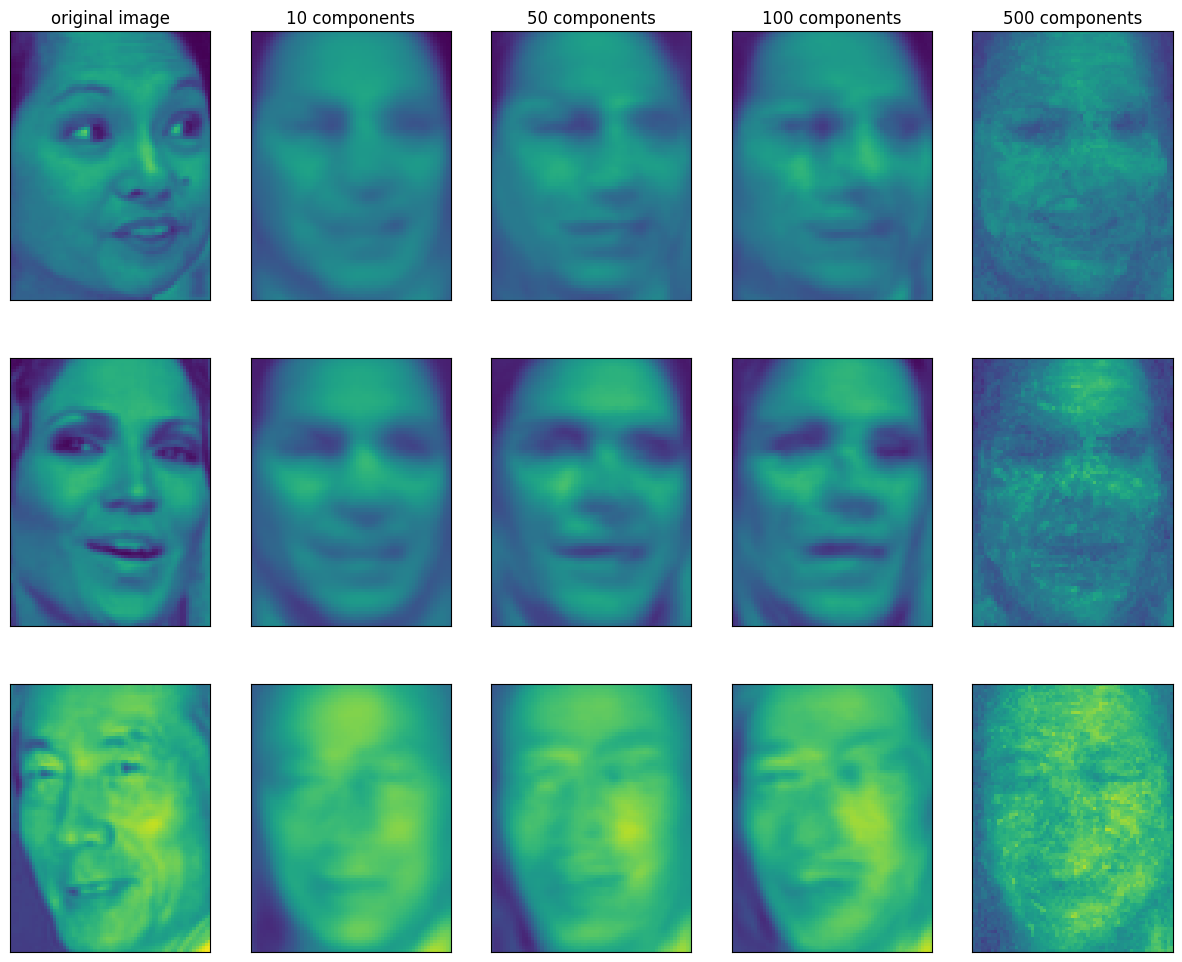

In [ ]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

In [12]:
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\CHU1P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\decomposition\_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >
 <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]


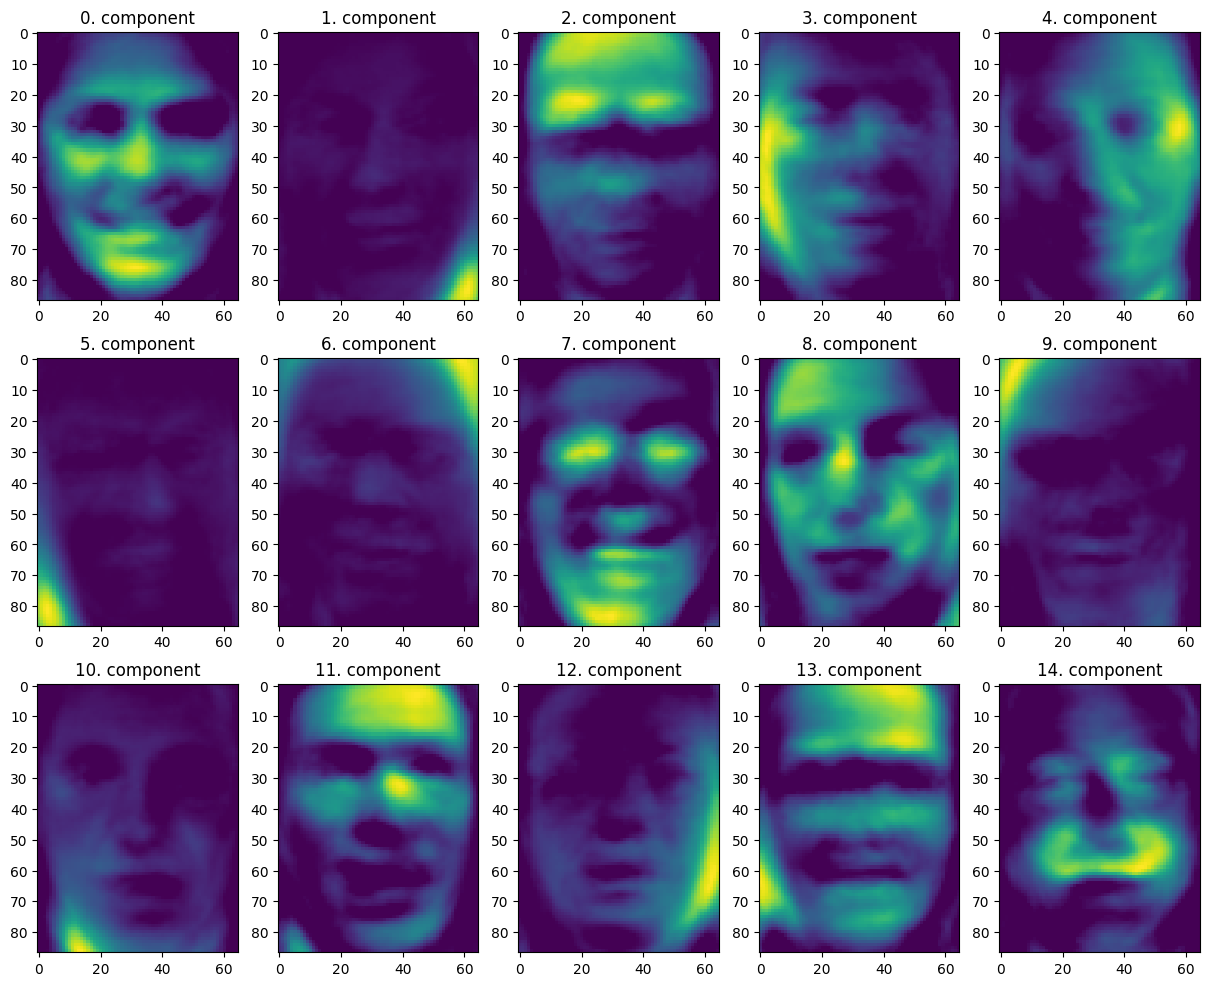

In [16]:
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fix, axes = plt.subplots(3, 5, figsize=(15, 12))
print(axes.ravel())
for i, (component, ax) in enumerate(zip(nmf.components_, axes.flatten())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title(f"{i}. component")

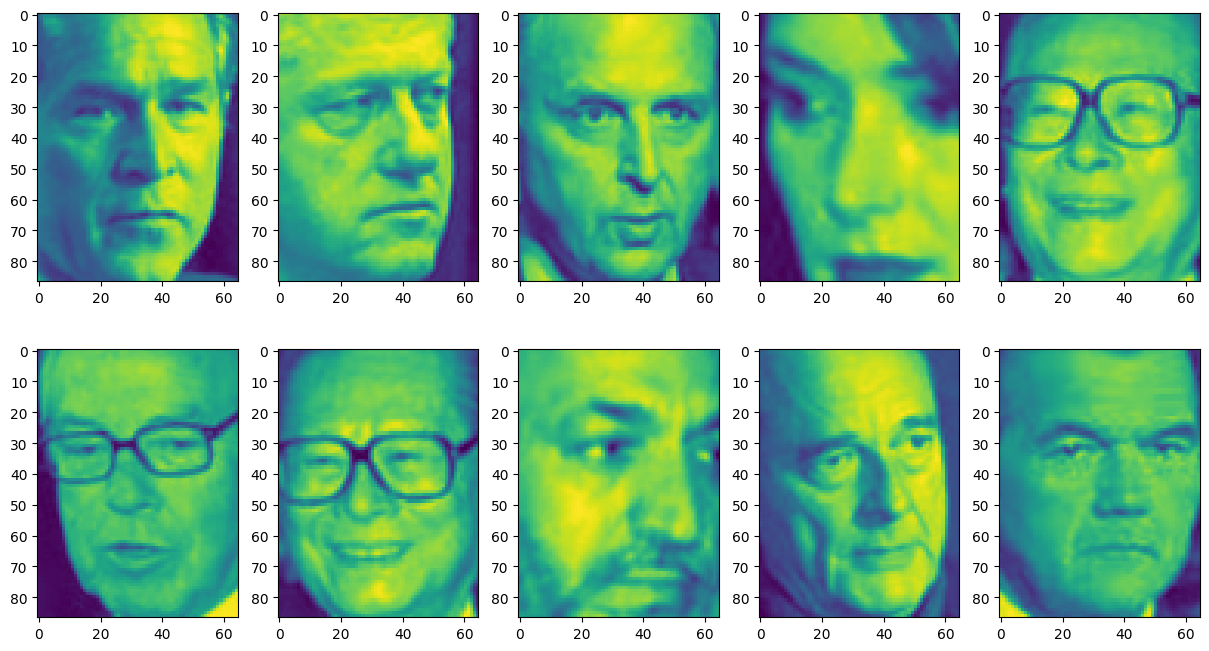

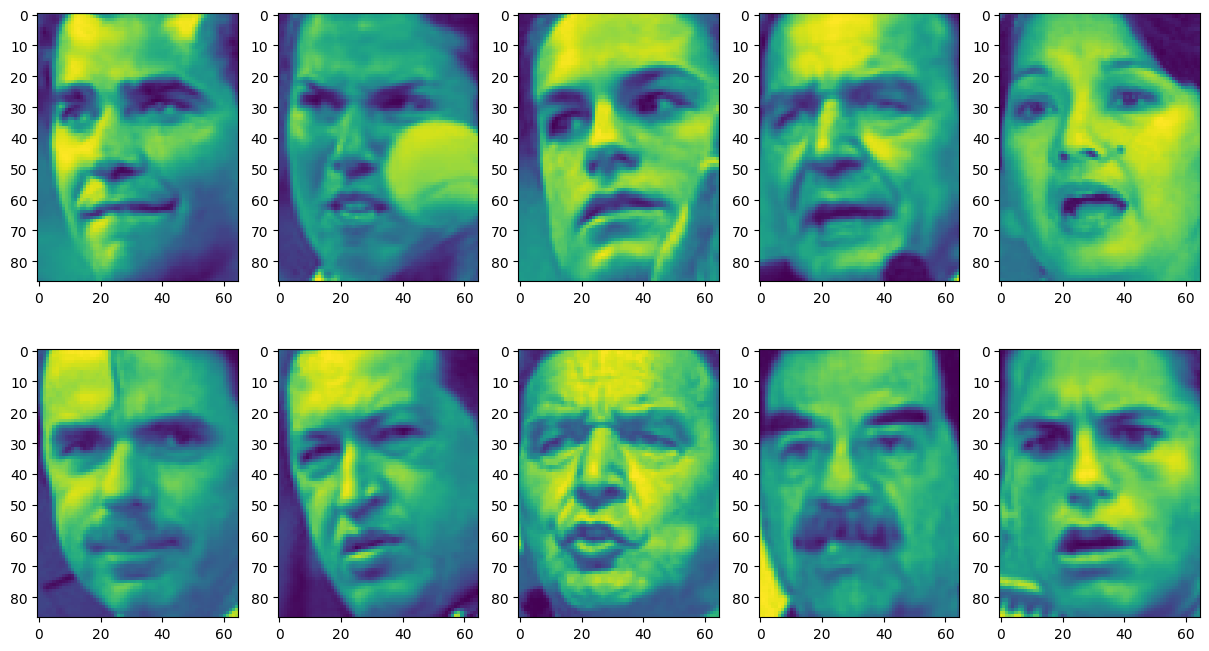

In [31]:
compn = 14

inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8))
for i, (ind, ax) in enumerate(zip(inds, axes.flatten())):
    ax.imshow(X_train[ind].reshape(image_shape))

compn = 8

inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8))

for i, (ind, ax) in enumerate(zip(inds, axes.flatten())):
    ax.imshow(X_train[ind].reshape(image_shape))

[[2.65408203 2.48908887 1.07757433]
 [2.94981947 3.45507031 0.79929765]
 [2.97649958 3.65235694 0.73473133]]


Text(0, 0.5, 'Signal')

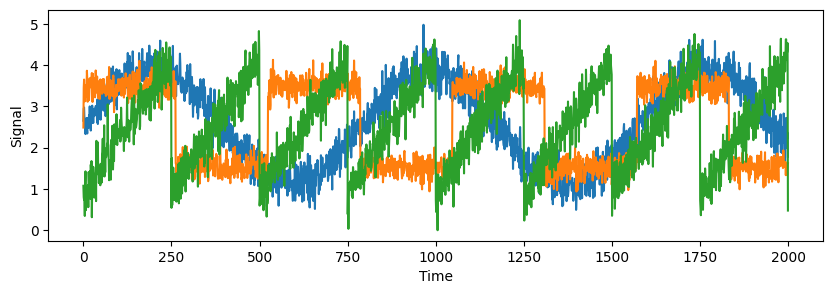

In [ ]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(10, 3))
plt.plot(S, "-")
plt.xlabel("Time")
plt.ylabel("Signal")

In [39]:
from sklearn.decomposition import PCA

In [114]:
# 
A = np.random.RandomState(0).uniform(size=(100, 3))
# print(A[:3])
X = np.matmul(S, A.T)
print(X.shape)

(2000, 100)


In [ ]:
# NMFで3つの線形独立ベクトルに変換する
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("Recoverd signal shape", S_.shape)

Recoverd signal shape (2000, 3)


In [116]:
# PCAで3つの直行ベクトルに変換する
pca = PCA(n_components=3)
H = pca.fit_transform(X)

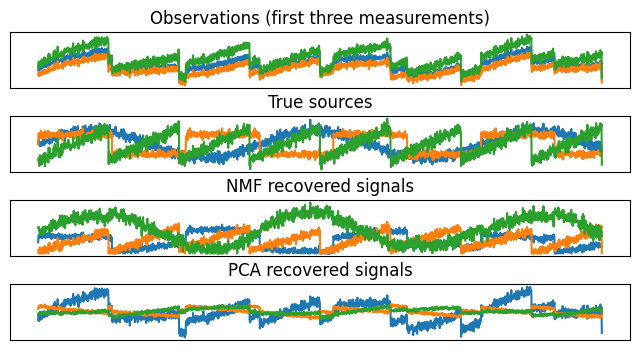

In [132]:
models = [X, S, S_, H]
names = ["Observations (first three measurements)",
         "True sources",
         "NMF recovered signals",
         "PCA recovered signals"]

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={"hspace": 0.5},
                         subplot_kw={"xticks": (), "yticks": ()})
for i, (model, name, ax) in enumerate(zip(models, names, axes)):
    ax.set_title(name)
    for j in range(3):
        ax.plot(model[:, j], "-")